>> # ENTRO

In [1]:
#entro

In [ ]:
#entro

In [ ]:
#entro

>> # CODE

> # Import  Libraries 

In [31]:
import os
import numpy as np
import shutil
import pandas as pd
from skimage.util import random_noise
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as mpimg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from skimage.filters import gaussian


> #  Get & Adjust Data

In [2]:
cancer_rays_dir     = os.listdir("Desktop\\final_proj\\breast_hostopathology_images_dataset\\") 
all_rays_dir        = "Desktop\\final_proj\\all_rays_dir" 
cancer_rays_dir_str ="Desktop\\final_proj\\breast_hostopathology_images_dataset\\"

In [3]:
print(cancer_rays_dir)
print(len(cancer_rays_dir))

['10253', '10254', '10255', '10256', '10257', '10258', '10259', '10260', '10261', '10262', '10264', '10268', '10269', '10272', '10273', '10274', '10275', '10276', '10277', '10278', '10279', '10282', '10285', '10286', '10288', '10290', '10291', '10292', '10293', '10295', '10299', '10300', '10301', '10302', '10303', '10304', '10305', '10306', '10307', '10308', '12241', '12242', '12626', '12748', '12749', '12750', '12751', '12752', '12810', '12811', '12817', '12818', '12819', '12820', '12821', '12822', '12823', '12824', '12826', '12867', '12868', '12869', '12870', '12871', '12872', '12873', '12875', '12876', '12877', '12878', '12879', '12880', '12881', '12882', '12883', '12884', '12886', '12890', '12891', '12892', '12893', '12894', '12895', '12896', '12897', '12898', '12900', '12901', '12905', '12906', '12907', '12908', '12909', '12910', '12911', '12929', '12930', '12931', '12932', '12933', '12934', '12935', '12947', '12948', '12949', '12951', '12954', '12955', '13018', '13019', '13020', 

In [4]:
os.mkdir(all_rays_dir)
all_rays_dir_lst = os.listdir('Desktop\\final_proj\\all_rays_dir')

- ### Collect all the images in one folder with modifying their id to using with them

In [76]:
for patient in cancer_rays_dir:   
    path_0 = cancer_rays_dir_str + str(patient) + '/0'
    path_1 = cancer_rays_dir_str + str(patient) + '/1'
    file_list_0 = os.listdir(path_0)   
    file_list_1 = os.listdir(path_1)
    for fname in file_list_0:
            src = os.path.join(path_0, fname)
            dst = os.path.join(all_rays_dir, fname)
            shutil.copyfile(src, dst)
    for fname in file_list_1:
        src = os.path.join(path_1, fname)
        dst = os.path.join(all_rays_dir, fname)
        shutil.copyfile(src, dst)

In [5]:
len(all_rays_dir_lst)

277524

- ### Put images in a data_frame for easy access

In [69]:
data = pd.DataFrame(all_rays_dir_lst, columns=['image_id'])
data.head()

,image_id
0,10253_idx5_x1001_y1001_class0.png
1,10253_idx5_x1001_y1051_class0.png
2,10253_idx5_x1001_y1101_class0.png
3,10253_idx5_x1001_y1151_class0.png
4,10253_idx5_x1001_y1201_class0.png


In [70]:
def extract_target(x):
    a = x.split('_')
    b = a[4]
    target = b[5] 
    return target

data['target'] = data['image_id'].apply(extract_target)

data.head(10)

,image_id,target
0,10253_idx5_x1001_y1001_class0.png,0
1,10253_idx5_x1001_y1051_class0.png,0
2,10253_idx5_x1001_y1101_class0.png,0
3,10253_idx5_x1001_y1151_class0.png,0
4,10253_idx5_x1001_y1201_class0.png,0
5,10253_idx5_x1001_y1251_class0.png,0
6,10253_idx5_x1001_y1301_class0.png,0
7,10253_idx5_x1001_y1351_class0.png,0
8,10253_idx5_x1001_y1501_class0.png,0
9,10253_idx5_x1001_y1551_class0.png,0


In [71]:
data['target'].value_counts()

0    198738
1     78786
Name: target, dtype: int64

> # EDA 

In [ ]:
#data.target = data.target.astype(np.int)
#fig, ax = plt.subplots(5,10,figsize=(20,10))
#pos_selection = np.random.choice(data[data.target ==0].index, size=50, replace=False,)
#for n in range(5):
#    for m in range(10):
#        idx = pos_selection[m + 10*n]
#        path =os.path.join(all_rays_dir,data.loc[idx, 'image_id'])
#        image = mpimg.imread(path)
#        ax[n,m].imshow(image)
#        ax[n,m].grid(False)



> # Processing and selection

# Image Processing 

- ## Apply some processing properties

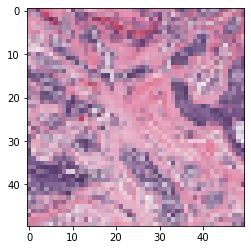

In [28]:
data.target = data.target.astype(np.int)
random_image_path = np.random.choice(data[data.target ==0].index, size=1, replace=False,)
path =os.path.join(all_rays_dir,data.loc[random_image[0], 'image_id'])
image = mpimg.imread(path)
plt.imshow(image)

<ipython-input-33-fe7c09b2dd66>:1: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  gaussian_image = gaussian(image)


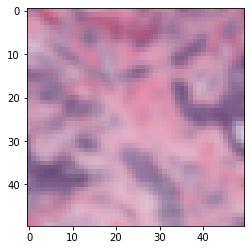

In [33]:
gaussian_image = gaussian(image)
plt.imshow(gaussian_image)

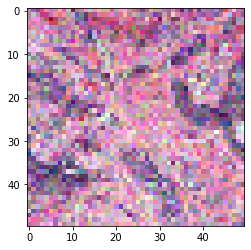

In [37]:
noise_image = random_noise(image)
plt.imshow(noise_image)

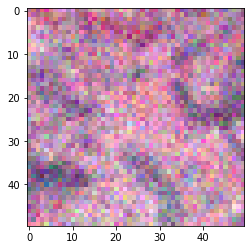

In [38]:
noise_gaussian_image = random_noise(gaussian_image)
plt.imshow(noise_gaussian_image)

- ## Processing using [random_noise] function

In [35]:
os.mkdir('Desktop\\final_proj\\image_processing')
os.mkdir('Desktop\\final_proj\\image_processing\\noise_images')

In [95]:
for normal_image in all_rays_dir_lst :
    path        = all_rays_dir+'\\'+ normal_image
    img         = mpimg.imread( path ,0)
    noise_image = random_noise(img)
    fname       = normal_image
    new_path    = os.path.join('Desktop\\final_proj\\image_processing\\noise_images',fname)
    mpimg.imsave(new_path, noise_image)
    

In [102]:
os.mkdir( 'Desktop\\final_proj\\image_processing\\processd_data_train\\zeros')
os.mkdir( 'Desktop\\final_proj\\image_processing\\processd_data_train\\ones')
os.mkdir( 'Desktop\\final_proj\\image_processing\\processd_data_test\\zeros')
os.mkdir( 'Desktop\\final_proj\\image_processing\\processd_data_test\\ones')


In [59]:
processd_lst = os.listdir('Desktop\\final_proj\\image_processing\\noise_images')
processd_lst_str = 'Desktop\\final_proj\\image_processing\\noise_images'
processd_data = pd.DataFrame(processd_lst, columns=['image_id'])
processd_data.head()

,image_id
0,10253_idx5_x1001_y1001_class0.png
1,10253_idx5_x1001_y1051_class0.png
2,10253_idx5_x1001_y1101_class0.png
3,10253_idx5_x1001_y1151_class0.png
4,10253_idx5_x1001_y1201_class0.png


In [62]:
def extract_target(x):
    a = x.split('_')
    b = a[4]
    target = b[5] 
    return target

processd_data['target'] = processd_data['image_id'].apply(extract_target)

processd_data.head(10)

,image_id,target
0,10253_idx5_x1001_y1001_class0.png,0
1,10253_idx5_x1001_y1051_class0.png,0
2,10253_idx5_x1001_y1101_class0.png,0
3,10253_idx5_x1001_y1151_class0.png,0
4,10253_idx5_x1001_y1201_class0.png,0
5,10253_idx5_x1001_y1251_class0.png,0
6,10253_idx5_x1001_y1301_class0.png,0
7,10253_idx5_x1001_y1351_class0.png,0
8,10253_idx5_x1001_y1501_class0.png,0
9,10253_idx5_x1001_y1551_class0.png,0


In [56]:
processd_data['target'].value_counts()

0    198738
1     78786
Name: target, dtype: int64

In [105]:
for image in processd_test:
    fname = image
    target = data.loc[image,'target']
    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(processd_lst_str, fname)
    dst = os.path.join("Desktop\\final_proj\\image_processing\\processd_data_test", label, fname)
    shutil.copyfile(src, dst)


In [104]:
processd_data.set_index('image_id', inplace=True)
for image in processd_train:
    fname  = image
    target = data.loc[image,'target']
    
    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(processd_lst_str, fname)
    dst = os.path.join('Desktop\\final_proj\\image_processing\\processd_data_train', label, fname)
    shutil.copyfile(src, dst)

In [106]:
print(len(os.listdir('Desktop\\final_proj\\image_processing\\processd_data_train\\zeros')))
print(len(os.listdir('Desktop\\final_proj\\image_processing\\processd_data_train\\ones')))
print(len(os.listdir('Desktop\\final_proj\\image_processing\\processd_data_test\\zeros')))
print(len(os.listdir('Desktop\\final_proj\\image_processing\\processd_data_test\\ones')))

178864
70907
19874
7879


# Processing  and Normal test

- ### the images we processed and the noraml of the photos are tested on the same model to see who is the best in the accuracy

- ### A small sample is taken for testing (20,000) images

### First: the processed images

In [178]:
os.mkdir( 'Desktop\\final_proj\\image_processing\\model_tst\\trainig\\zeros')
os.mkdir( 'Desktop\\final_proj\\image_processing\\model_tst\\trainig\\ones')
os.mkdir( 'Desktop\\final_proj\\image_processing\\model_tst\\testing\\zeros')
os.mkdir( 'Desktop\\final_proj\\image_processing\\model_tst\\testing\\ones')

In [12]:
df_0 = processd_data[processd_data['target'] == '0'].sample(10000, random_state=101)
df_1 = processd_data[processd_data['target'] == '1'].sample(10000, random_state=101)
test_data =pd.DataFrame(data)
test_data = pd.concat([df_0, df_1], axis=0).reset_index(drop=True)
test_y = test_data['target']
test_data_train, test_data_test = train_test_split(test_data, test_size=0.10, random_state=101, stratify=test_y)
sts_train = test_data_train.image_id
tst_test  = test_data_test.image_id
test_data.set_index('image_id', inplace=True)
for image in sts_train:
    fname  = image
    target = test_data.loc[image,'target']
    
    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(all_rays_dir, fname)
    dst = os.path.join('Desktop\\final_proj\\image_processing\\model_tst\\trainig', label, fname)
    shutil.copyfile(src, dst)
for image in tst_test:
    fname  = image
    target = test_data.loc[image,'target']
    
    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(all_rays_dir, fname)
    dst = os.path.join('Desktop\\final_proj\\image_processing\\model_tst\\testing', label, fname)
    shutil.copyfile(src, dst)    


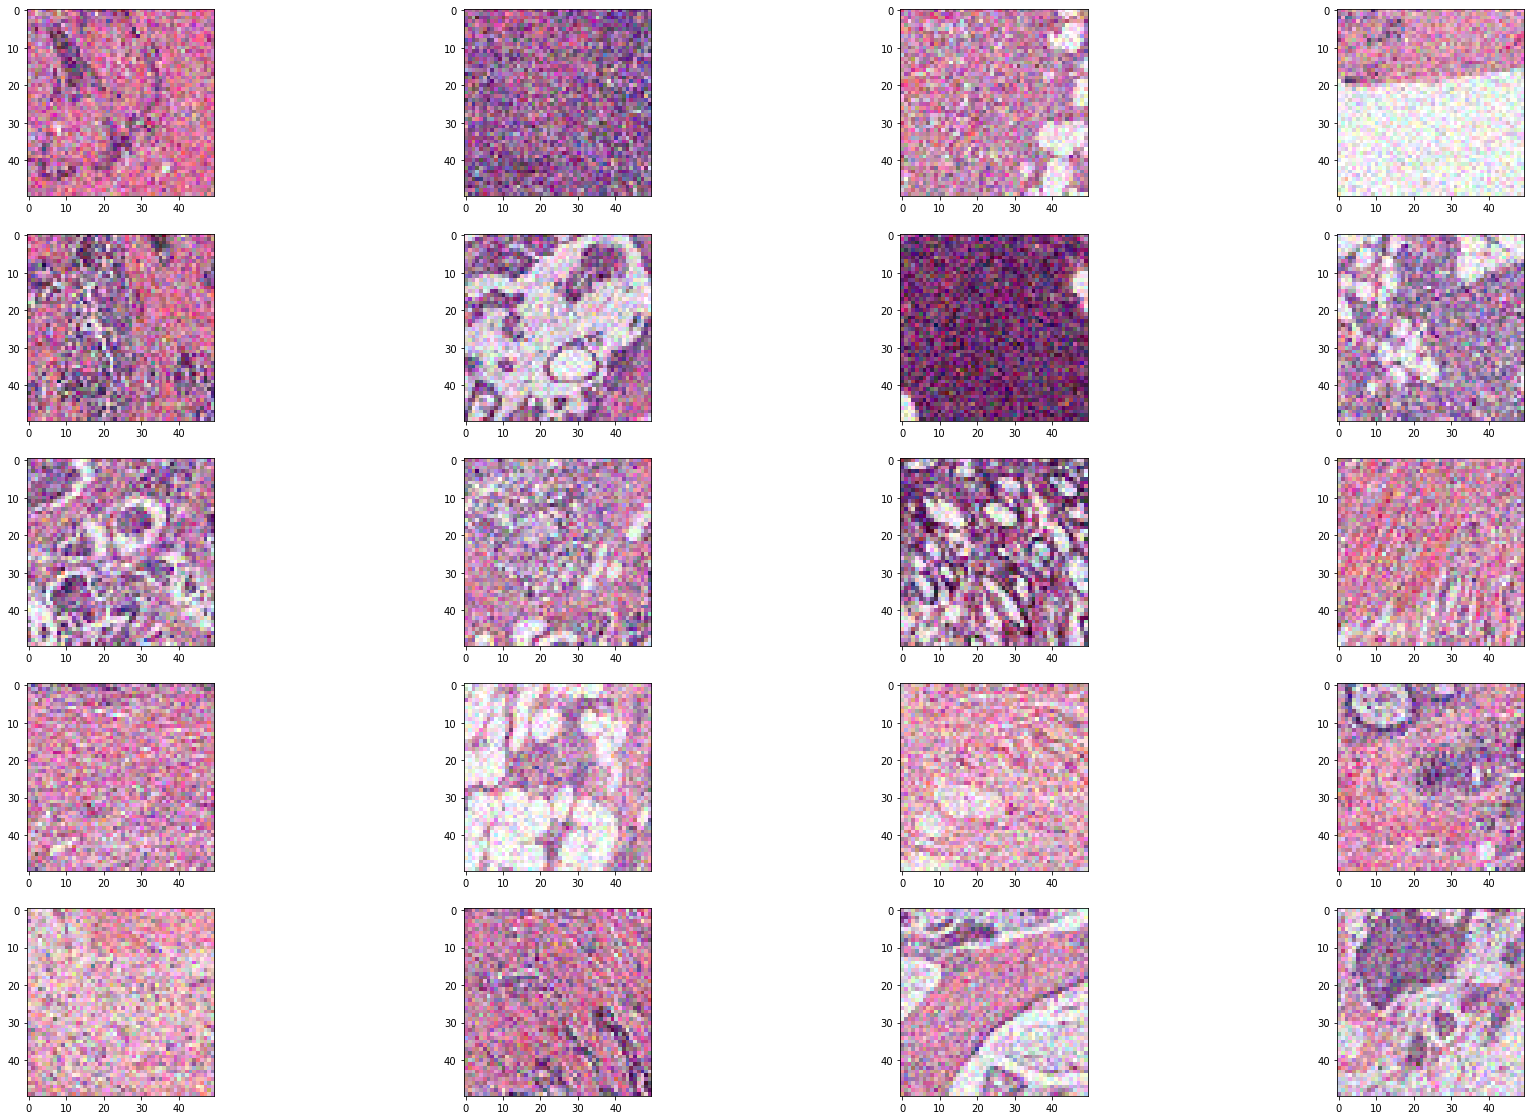

In [63]:
processd_data.target = processd_data.target.astype(np.int)
fig, ax = plt.subplots(5,4,figsize=(30,20))
pos_selection = np.random.choice(processd_data[processd_data.target==1].index.values, size=20, replace=False)
neg_selection = np.random.choice(processd_data[processd_data.target==0].index.values, size=20, replace=False)
for n in range(5):
    for m in range(4):
        idx = pos_selection[m + 4*n]
        path =os.path.join(processd_lst_str,processd_data.loc[idx, 'image_id'])
        image = mpimg.imread(path)
        ax[n,m].imshow(image)
        ax[n,m].grid(False)

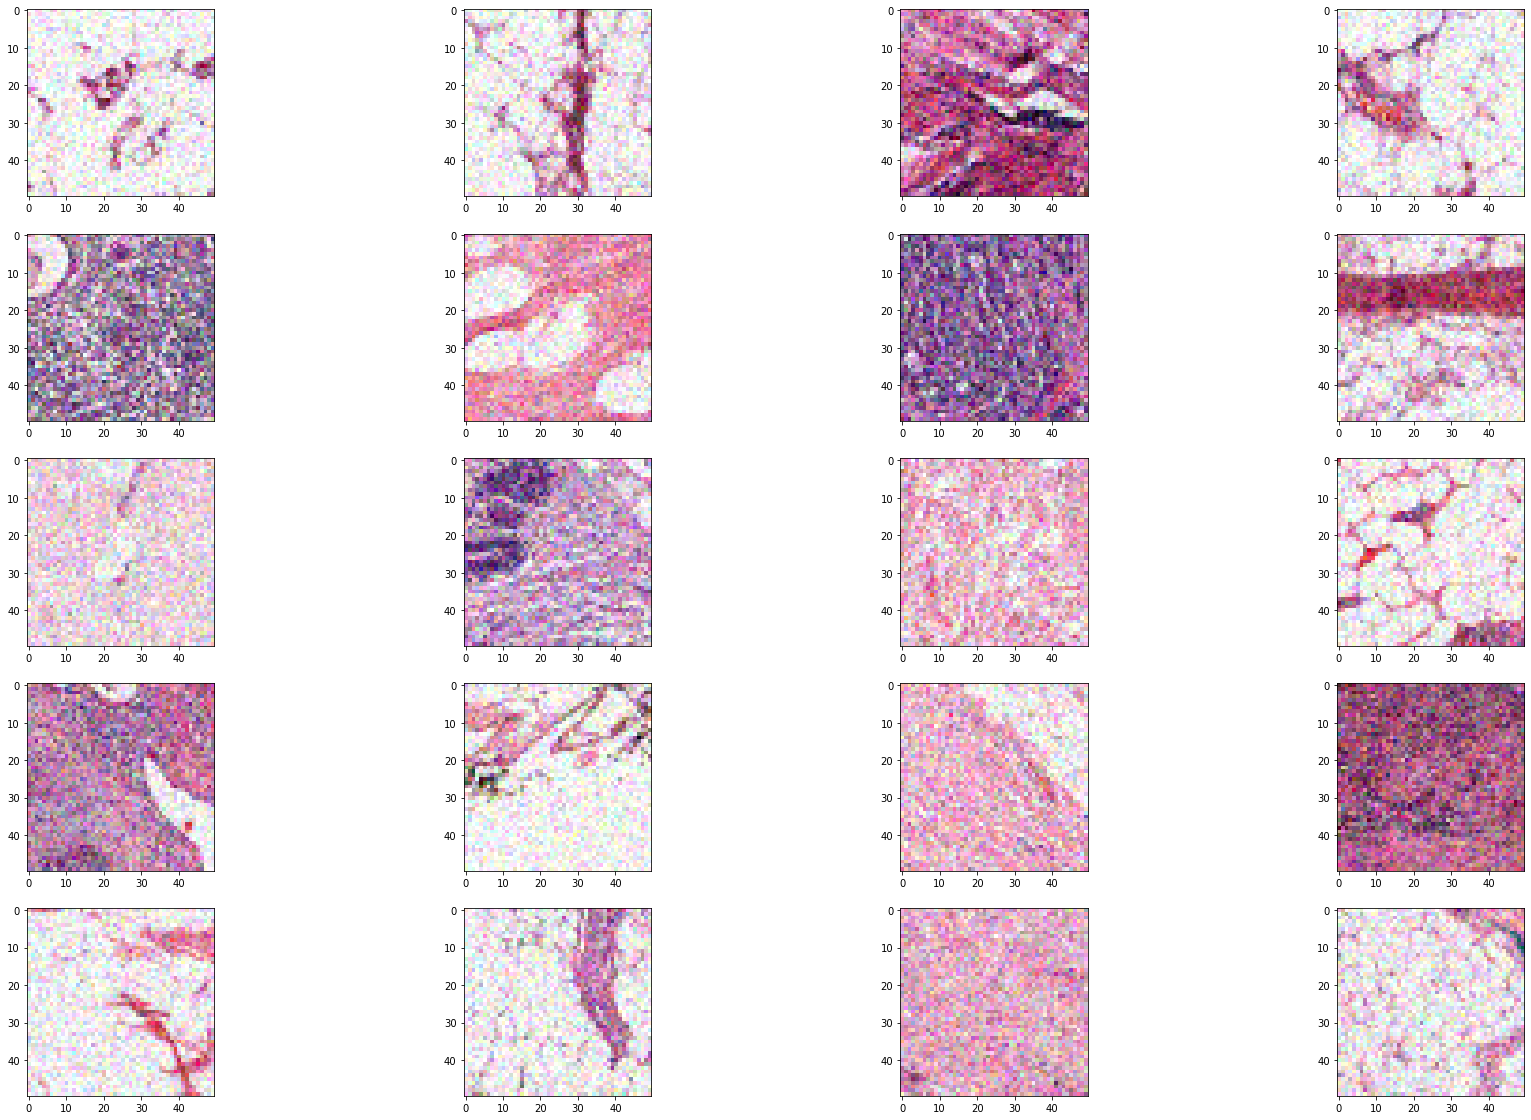

In [65]:
fig, ax = plt.subplots(5,4,figsize=(30,20))
for n in range(5):
    for m in range(4):
        idx = neg_selection[m + 4*n]
        path =os.path.join(processd_lst_str,processd_data.loc[idx, 'image_id'])
        image = mpimg.imread(path)
        ax[n,m].imshow(image)
        ax[n,m].grid(False)

In [13]:
data_processd_test_generation = ImageDataGenerator(rescale=1.0/255)
train_generation_processd = data_processd_test_generation.flow_from_directory("Desktop\\final_proj\\image_processing\\model_tst\\trainig", target_size=(50,50), batch_size=10,class_mode='categorical')
test_generation_processd = data_processd_test_generation.flow_from_directory("Desktop\\final_proj\\image_processing\\model_tst\\testing",target_size=(50,50),batch_size=10,class_mode='categorical')

Found 18000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [15]:
my_model_im_processd =Sequential()
my_model_im_processd.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(50,50,3),activation='relu'))
my_model_im_processd.add(MaxPool2D(pool_size=(2,2)))


my_model_im_processd.add(Flatten())

my_model_im_processd.add(Dense(128,activation='relu'))

my_model_im_processd.add(Dense(2,activation='softmax'))

my_model_im_processd.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics= ['accuracy'])

In [17]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)
my_model_im_processd.fit_generator(train_generation_processd,validation_data=test_generation_processd,epochs=60, verbose=1,callbacks=early_stop)

C:\Users\zeado\anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/60
1800/1800 [==============================] - 344s 190ms/step - loss: 0.5252 - accuracy: 0.7552 - val_loss: 0.5818 - val_accuracy: 0.7180
Epoch 2/60
1800/1800 [==============================] - 100s 55ms/step - loss: 0.4949 - accuracy: 0.7704 - val_loss: 0.4938 - val_accuracy: 0.7660
Epoch 3/60
1800/1800 [==============================] - 102s 57ms/step - loss: 0.4715 - accuracy: 0.7891 - val_loss: 0.4551 - val_accuracy: 0.7985
Epoch 4/60
1800/1800 [==============================] - 102s 57ms/step - loss: 0.4558 - accuracy: 0.7974 - val_loss: 0.4683 - val_accuracy: 0.7950
Epoch 5/60
1800/1800 [==============================] - 100s 56ms/step - loss: 0.4391 - accuracy: 0.8053 - val_loss: 0.5133 - val_accuracy: 0.7670


### Second: the normal images

In [67]:
os.mkdir( 'Desktop\\final_proj\\image_processing\\normal')
os.mkdir( 'Desktop\\final_proj\\image_processing\\normal\\model_tst') 
os.mkdir( 'Desktop\\final_proj\\image_processing\\normal\\model_tst\\trainig')
os.mkdir( 'Desktop\\final_proj\\image_processing\\normal\\model_tst\\testing')
os.mkdir( 'Desktop\\final_proj\\image_processing\\normal\\model_tst\\trainig\\zeros')
os.mkdir( 'Desktop\\final_proj\\image_processing\\normal\\model_tst\\trainig\\ones')
os.mkdir( 'Desktop\\final_proj\\image_processing\\normal\\model_tst\\testing\\zeros')
os.mkdir( 'Desktop\\final_proj\\image_processing\\normal\\model_tst\\testing\\ones')

In [72]:
df_0 = data[data['target'] == '0'].sample(10000, random_state=101)
df_1 = data[data['target'] == '1'].sample(10000, random_state=101)
test_data =pd.DataFrame(data)
test_data = pd.concat([df_0, df_1], axis=0).reset_index(drop=True)
test_y = test_data['target']
test_data_train, test_data_test = train_test_split(test_data, test_size=0.10, random_state=101, stratify=test_y)
sts_train = test_data_train.image_id
tst_test  = test_data_test.image_id
test_data.set_index('image_id', inplace=True)
for image in sts_train:
    fname  = image
    target = test_data.loc[image,'target']
    
    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(all_rays_dir, fname)
    dst = os.path.join('Desktop\\final_proj\\image_processing\\normal\\model_tst\\trainig', label, fname)
    shutil.copyfile(src, dst)
for image in tst_test:
    fname  = image
    target = test_data.loc[image,'target']
    
    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(all_rays_dir, fname)
    dst = os.path.join('Desktop\\final_proj\\image_processing\\normal\\model_tst\\testing', label, fname)
    shutil.copyfile(src, dst)    


In [74]:
data_normal_test_generation = ImageDataGenerator(rescale=1.0/255)
train_generation_normal = data_normal_test_generation.flow_from_directory("Desktop\\final_proj\\image_processing\\normal\\model_tst\\trainig", target_size=(50,50), batch_size=10,class_mode='categorical')
test_generation_normal = data_normal_test_generation.flow_from_directory("Desktop\\final_proj\\image_processing\\normal\\model_tst\\testing",target_size=(50,50),batch_size=10,class_mode='categorical')

Found 18000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [75]:
my_model_im_norm =Sequential()
my_model_im_norm.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(50,50,3),activation='relu'))
my_model_im_norm.add(MaxPool2D(pool_size=(2,2)))


my_model_im_norm.add(Flatten())

my_model_im_norm.add(Dense(128,activation='relu'))
my_model_im_norm.add(Dense(2,activation='softmax'))

my_model_im_norm.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics= ['accuracy'])

In [76]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)
my_model_im_processd.fit_generator(train_generation_normal,validation_data=test_generation_normal,epochs=60, verbose=1,callbacks=early_stop)

C:\Users\zeado\anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/60
1800/1800 [==============================] - 332s 184ms/step - loss: 0.4209 - accuracy: 0.8166 - val_loss: 0.5193 - val_accuracy: 0.7650
Epoch 2/60
1800/1800 [==============================] - 92s 51ms/step - loss: 0.4273 - accuracy: 0.8151 - val_loss: 0.4623 - val_accuracy: 0.7905
Epoch 3/60
1800/1800 [==============================] - 93s 52ms/step - loss: 0.3895 - accuracy: 0.8341 - val_loss: 0.4769 - val_accuracy: 0.7850
Epoch 4/60
1800/1800 [==============================] - 95s 53ms/step - loss: 0.3602 - accuracy: 0.8439 - val_loss: 0.5446 - val_accuracy: 0.7935


## note < Normal images are the best in modeling >

> # Modeling

# Data Spliting & Generation

In [79]:
y = data['target']
data_train, data_test = train_test_split(data, test_size=0.10, random_state=101, stratify=y)

In [80]:
print(data_train.shape)
print(data_test.shape)

(222019, 2)
(55505, 2)


In [77]:
os.mkdir( 'Desktop\\final_proj\\train_dir')
os.mkdir('Desktop\\final_proj\\test_dir')

In [78]:
os.mkdir( 'Desktop\\final_proj\\train_dir\\zeros')
os.mkdir( 'Desktop\\final_proj\\train_dir\\ones')

os.mkdir( 'Desktop\\final_proj\\test_dir\\zeros')
os.mkdir( 'Desktop\\final_proj\\test_dir\\ones')


In [81]:
train = data_train.image_id
test  = data_test.image_id

In [85]:
data.set_index('image_id', inplace=True)
for image in train:
    fname  = image
    target = data.loc[image,'target']
    
    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(all_rays_dir, fname)
    dst = os.path.join('Desktop\\final_proj\\train_dir', label, fname)
    shutil.copyfile(src, dst)

In [86]:
for image in test:
    fname = image
    target = data.loc[image,'target']
    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(all_rays_dir, fname)
    dst = os.path.join("Desktop\\final_proj\\test_dir", label, fname)
    shutil.copyfile(src, dst)


In [84]:
print('non-IDC train      =',len(os.listdir('Desktop\\final_proj\\train_dir\\zeros')))
print('IDC train          =',len(os.listdir('Desktop\\final_proj\\train_dir\\ones')))
print('non-IDC validation =',len(os.listdir('Desktop\\final_proj\\test_dir\\zeros')))
print('IDC validation     =',len(os.listdir('Desktop\\final_proj\\test_dir\\ones')))

non-IDC train      = 178864
IDC train          = 70907
non-IDC validation = 19874
IDC validation     = 7879


In [57]:
data_generation = ImageDataGenerator(rescale=1.0/255)

In [58]:
train_generation = data_generation.flow_from_directory(
                                        "Desktop\\final_proj\\train_dir",
                                        target_size=(25,25),
                                        batch_size=10,
                                        class_mode='categorical')
test_generation = data_generation.flow_from_directory(
                                        "Desktop\\final_proj\\test_dir",
                                        target_size=(25,25),
                                        batch_size=10,
                                        class_mode='categorical')



Found 249771 images belonging to 2 classes.
Found 27753 images belonging to 2 classes.


># Model design

In [67]:
my_model =Sequential()
my_model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(25,25,3),activation='relu'))
my_model.add(MaxPool2D(pool_size=(2,2)))


my_model.add(Flatten())

my_model.add(Dense(128,activation='relu'))

my_model.add(Dense(2,activation='softmax'))

my_model.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics= ['accuracy'])

In [68]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [69]:
my_model.fit_generator(train_generation,validation_data=test_generation,epochs=60, verbose=1,callbacks=early_stop)

Epoch 1/60
24978/24978 [==============================] - 1448s 58ms/step - loss: 0.4198 - accuracy: 0.8158 - val_loss: 0.3896 - val_accuracy: 0.8305
Epoch 2/60
24978/24978 [==============================] - 282s 11ms/step - loss: 0.3824 - accuracy: 0.8362 - val_loss: 0.3625 - val_accuracy: 0.8445
Epoch 3/60
24978/24978 [==============================] - 266s 11ms/step - loss: 0.3713 - accuracy: 0.8412 - val_loss: 0.3648 - val_accuracy: 0.8412
Epoch 4/60
24978/24978 [==============================] - 249s 10ms/step - loss: 0.3636 - accuracy: 0.8445 - val_loss: 0.3512 - val_accuracy: 0.8470
Epoch 5/60
24978/24978 [==============================] - 320s 13ms/step - loss: 0.3570 - accuracy: 0.8474 - val_loss: 0.3501 - val_accuracy: 0.8514
Epoch 6/60
24978/24978 [==============================] - 829s 33ms/step - loss: 0.3526 - accuracy: 0.8493 - val_loss: 0.3433 - val_accuracy: 0.8504
Epoch 7/60
24978/24978 [==============================] - 823s 33ms/step - loss: 0.3487 - accuracy: 0.850

># Outputs and Outcomes

In [70]:
losse = pd.DataFrame(my_model.history.history)
losse.head()

,loss,accuracy,val_loss,val_accuracy
0,0.419787,0.815783,0.389573,0.830505
1,0.382361,0.836158,0.362486,0.844485
2,0.371320,0.841215,0.364781,0.841206
3,0.363622,0.844510,0.351164,0.847044
4,0.357006,0.847392,0.350107,0.851367


<AxesSubplot:>

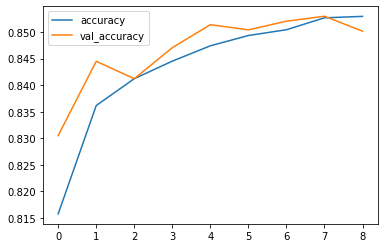

In [71]:
losse[['accuracy','val_accuracy']].plot()


<AxesSubplot:>

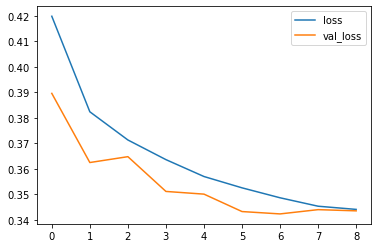

In [72]:
losse[['loss','val_loss']].plot()


In [ ]:
# Score&Confusion Matrix & Classification Report